In [445]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

data = pd.read_csv('EU.csv')
print(data.head())

   Unnamed: 0     dateRep  day  month  year  cases  deaths  \
0         681  14/12/2020   14     12  2020    788      14   
1         683  13/12/2020   13     12  2020    879      12   
2         685  12/12/2020   12     12  2020    802      12   
3         687  11/12/2020   11     12  2020    873      14   
4         689  10/12/2020   10     12  2020    752      15   

  countriesAndTerritories countryterritoryCode  popData2019 continentExp  \
0                 Albania                  ALB      2862427       Europe   
1                 Albania                  ALB      2862427       Europe   
2                 Albania                  ALB      2862427       Europe   
3                 Albania                  ALB      2862427       Europe   
4                 Albania                  ALB      2862427       Europe   

   Cumulative_number_for_14_days_of_COVID-19_cases_per_100000  
0                                         380.970414           
1                                         

In [446]:
countries = data.drop_duplicates("countriesAndTerritories")
countries.head() # get all eu country names

,Unnamed: 0,dateRep,day,month,year,cases,deaths,countriesAndTerritories,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,681,14/12/2020,14,12,2020,788,14,Albania,ALB,2862427,Europe,380.970414
281,1933,14/12/2020,14,12,2020,50,1,Andorra,AND,76177,Europe,821.770351
557,4653,14/12/2020,14,12,2020,357,17,Armenia,ARM,2957728,Europe,458.392388
898,6569,14/12/2020,14,12,2020,3005,45,Austria,AUT,8858775,Europe,472.458100
1248,7269,14/12/2020,14,12,2020,4451,39,Azerbaijan,AZE,10047719,Europe,574.050687


In [447]:
# gets days since start of pandemic
days = []
for i in range(len(countries)):
    currentCountry = countries.iloc[i,7]
    df = data[data["countriesAndTerritories"] == currentCountry]
    d = len(df)
    while d != 0:
        days.append(d)
        d -= 1

#print(len(days))
data["NumOfDays"] = pd.DataFrame(days)

In [448]:
highPop = countries.sort_values("popData2019",ascending=False).head(25)

       Unnamed: 0     dateRep  day  month  year  cases  deaths  \
13876       93839  14/12/2020   14     12  2020  28080     488   
5837        43761  14/12/2020   14     12  2020  16362     188   
16470      113899  14/12/2020   14     12  2020  29136     222   
5140        40729  14/12/2020   14     12  2020  11533     150   
17022      116757  14/12/2020   14     12  2020  18447     144   
8601        58199  14/12/2020   14     12  2020  17937     484   
15421      105447  13/12/2020   13     12  2020      0       0   
16746      115517  14/12/2020   14     12  2020  15627     249   
12957       90785  14/12/2020   14     12  2020   8976     188   
13528       93143  14/12/2020   14     12  2020   4435     121   
11916       80357  14/12/2020   14     12  2020   9868      29   
1933        10975  14/12/2020   14     12  2020      2       6   
6457        45553  14/12/2020   14     12  2020    692      85   
3465        29905  14/12/2020   14     12  2020   2000      74   
13241     

In [449]:
highestPop = []
skip = ["Bosnia_and_Herzegovina", "Andorra","Czechia","Faroe_Islands","Gibraltar","Guernsey","Holy_See","Isle_of_Man","Jersey","Kosovo","Liechtenstein","Monaco","North_Macedonia","San_Marino","Slovakia"]
for i in range(len(countries)):
    currentCountry = countries.iloc[i,7]
    if currentCountry not in skip: 
        highestPop.append(currentCountry)

df = data.loc[data["countriesAndTerritories"].isin(highestPop)]
df.head()

,Unnamed: 0,dateRep,day,month,year,cases,deaths,countriesAndTerritories,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,NumOfDays
0,681,14/12/2020,14,12,2020,788,14,Albania,ALB,2862427,Europe,380.970414,281
1,683,13/12/2020,13,12,2020,879,12,Albania,ALB,2862427,Europe,382.612377,280
2,685,12/12/2020,12,12,2020,802,12,Albania,ALB,2862427,Europe,370.943958,279
3,687,11/12/2020,11,12,2020,873,14,Albania,ALB,2862427,Europe,365.459102,278
4,689,10/12/2020,10,12,2020,752,15,Albania,ALB,2862427,Europe,357.878122,277


In [450]:
del df["Unnamed: 0"]
del df["day"]
del df["month"]
del df["year"]
del df["countryterritoryCode"]
del df["continentExp"]

In [451]:
df.to_csv("TopEUCovid.csv")

In [452]:
newdata = df.copy()
newdata.head()

,dateRep,cases,deaths,countriesAndTerritories,popData2019,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,NumOfDays
0,14/12/2020,788,14,Albania,2862427,380.970414,281
1,13/12/2020,879,12,Albania,2862427,382.612377,280
2,12/12/2020,802,12,Albania,2862427,370.943958,279
3,11/12/2020,873,14,Albania,2862427,365.459102,278
4,10/12/2020,752,15,Albania,2862427,357.878122,277


In [453]:
lifeEx = pd.read_csv('life_expectancy_years.csv')

for col in lifeEx.columns:
    if col != "2020" and col!= "country":
        del lifeEx[col]

lifeClean = lifeEx[lifeEx["country"].isin(highestPop)].copy()
lifeClean["2020"] = lifeClean["2020"].replace(np.nan, 0)
lifeClean.head()




,country,2020
1,Albania,78.6
7,Armenia,76.0
9,Austria,82.1
10,Azerbaijan,71.2
15,Belarus,74.6


In [462]:
vaccData = pd.read_csv('vccin_effect_dag.csv')


for col in vaccData.columns:
    if col != "2018" and col!= "country":
        del vaccData[col]

vaccClean = vaccData[vaccData["country"].isin(highestPop)].copy()
vaccClean["2018"] = vaccClean["2018"].replace(np.nan, 0)
vaccClean["2018"] = vaccClean["2018"]*100
vaccClean.head()

,country,2018
1,Albania,9.0
4,Armenia,12.5
6,Austria,11.3
7,Azerbaijan,8.4
9,Belarus,9.8


In [463]:
dfObj = pd.DataFrame(columns=["country","TotalDeaths"])
total = []
for country in highestPop:
    current =  newdata[newdata["countriesAndTerritories"] == country]
    totalDeaths  = sum(current["deaths"])
    dfObj = dfObj.append({"country":country, "TotalDeaths": totalDeaths}, ignore_index=True)
    
dfObj["TotalDeaths"] = dfObj["TotalDeaths"].replace(np.nan,0)   


In [464]:
DLV = pd.DataFrame(columns=["country","TotalDeaths","LifeEx","Vaccine"])

for c in highestPop:
    DLV = DLV.append({"country" : c,"TotalDeaths" : dfObj[dfObj["country"] == c]["TotalDeaths"].values[0] ,"LifeEx":lifeClean[lifeClean["country"] == c]["2020"].values[0],"Vaccine":vaccClean[vaccClean["country"] == c]["2018"].values[0]},ignore_index=True)

DLV.head()

,country,TotalDeaths,LifeEx,Vaccine
0,Albania,1003,78.6,9.0
1,Armenia,2503,76.0,12.5
2,Austria,4400,82.1,11.3
3,Azerbaijan,1922,71.2,8.4
4,Belarus,1263,74.6,9.8


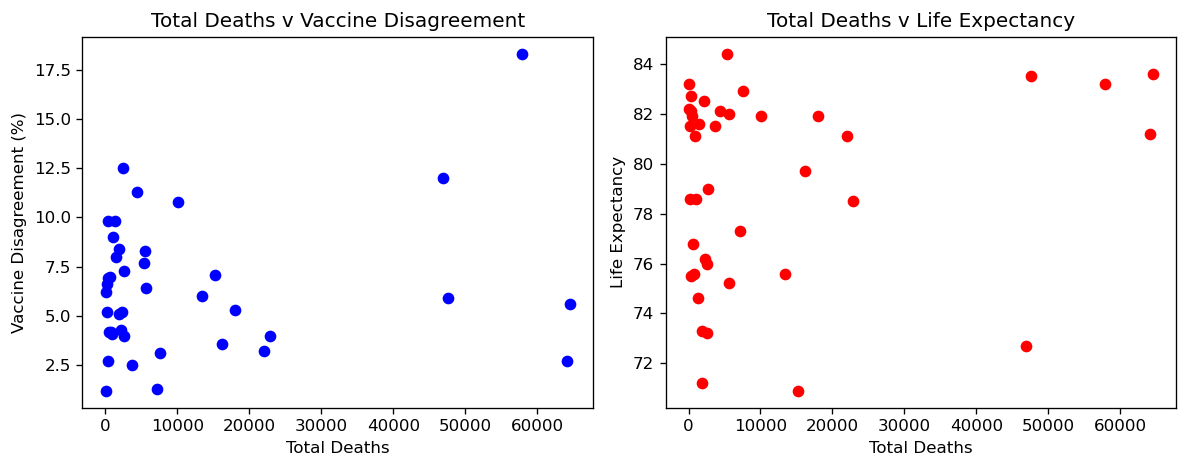

In [467]:
"""
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(DLV["TotalDeaths"], DLV["Vaccine"], color='b')
ax.set_xlabel('Total Deaths')
ax.set_ylabel('LifeExpectancy')
ax.set_title('Total Deaths vs Life Expectancy')
"""
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4), dpi=120)

ax1.scatter(DLV["TotalDeaths"], DLV["Vaccine"], color='b') 
ax2.scatter(DLV["TotalDeaths"], DLV["LifeEx"], color='r')  

ax1.set_title('Total Deaths v Vaccine Disagreement')
ax1.set_xlabel('Total Deaths')
ax1.set_ylabel('Vaccine Disagreement (%)')


ax2.set_title('Total Deaths v Life Expectancy')
ax2.set_xlabel('Total Deaths')  
ax2.set_ylabel('Life Expectancy') 


plt.tight_layout()
plt.show()

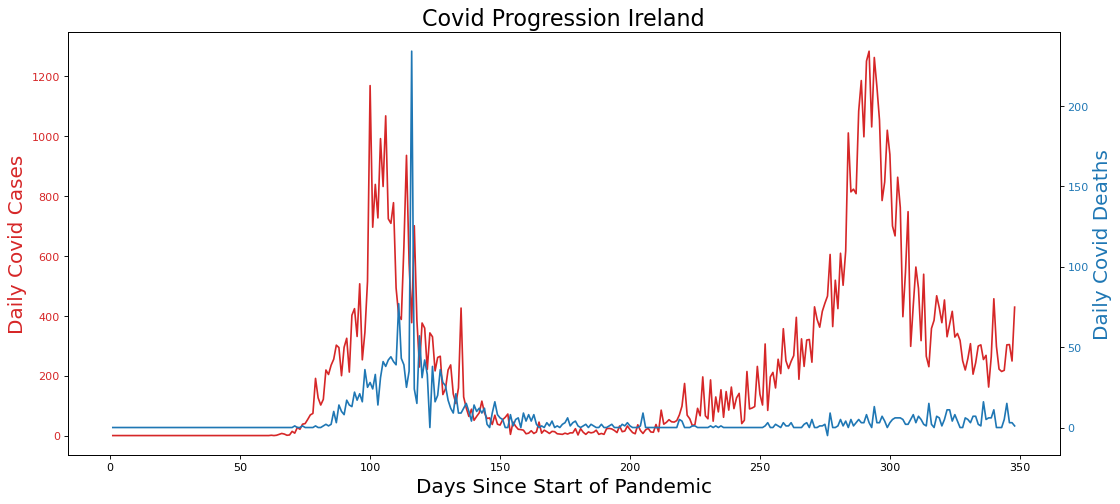

In [458]:

df = newdata[newdata["countriesAndTerritories"] == "Ireland"]        

x = df['NumOfDays']
y1 = df['cases']
y2 = df['deaths']

fig, ax1 = plt.subplots(1,1,figsize=(16,7), dpi= 80)
ax1.plot(x, y1, color='tab:red')

ax2 = ax1.twinx()
ax2.plot(x, y2, color='tab:blue')


ax1.set_xlabel('Days Since Start of Pandemic', fontsize=18)
ax1.set_ylabel('Daily Covid Cases', color='tab:red', fontsize=18)
ax1.tick_params(axis='y', rotation=0, labelcolor='tab:red' )

ax2.set_ylabel("Daily Covid Deaths", color='tab:blue', fontsize=18)
ax2.tick_params(axis='y', labelcolor='tab:blue')
ax2.set_title("Covid Progression Ireland", fontsize=20)


plt.show()    






